In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("./res/titanic/train.csv", index_col="PassengerId")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 호칭별 데이터 정렬

In [66]:
titanic["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [105]:
import re

In [124]:
p = re.compile("[A-Z][a-z]+[.]")
title = titanic["Name"].str.findall(p).str[0].value_counts(sort=True, ascending=False)
title.head(10)


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Jonkheer.      1
Name: Name, dtype: int64

### 나이 구간별 데이터 정렬

In [46]:
# Null값 배제
titanicNotNullA= titanic[titanic["Age"].notnull()]
titanicNotNullA

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

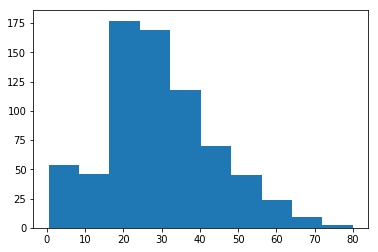

In [24]:
plt.hist(titanicNotNullA["Age"])

(array([0., 0., 1., 3., 3., 7., 0., 0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 9 Patch objects>)

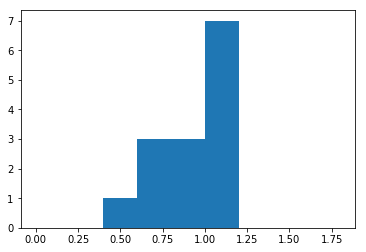

In [29]:
plt.hist(titanicNotNullA["Age"], bins=np.arange(0, 2, 0.2))

In [44]:
# 1 미만의 데이터는 제외
titanicNotNullA[titanicNotNullA["Age"] < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum
PassengerId,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,1
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,0
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,0
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0


In [47]:
titanicNotNullA = titanicNotNullA[titanicNotNullA["Age"] >= 1]

=== 구간 ======== 건수 ===
(20.0, 30.0]      231
(30.0, 40.0]      155
(10.0, 20.0]      116
(40.0, 50.0]       84
(-0.001, 10.0]     57
(50.0, 60.0]       42
(60.0, 70.0]       18
(70.0, 80.0]        4
(80.0, 90.0]        0
Name: Age, dtype: int64


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([ 55., 102., 220., 167.,  89.,  48.,  19.,   6.,   1.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

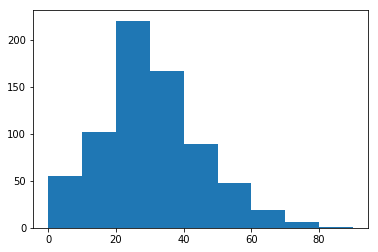

In [64]:
# 소수점인 경우 반올림
titanicNotNullA["Age"] = titanicNotNullA["Age"].round()
print("=== 구간 ======== 건수 ===")
print(titanicNotNullA["Age"].value_counts(sort=True, ascending=False, bins = np.arange(0, 91, 10)))
plt.hist(titanicNotNullA["Age"], bins = np.arange(0, 91, 10))

### 성별 이진화

In [12]:
titanic["SexNum"] = np.where(titanic["Sex"] == "male", 0, 1) # Male = 0, Female = 1
titanic[["Sex", "SexNum"]].head(10)

,Sex,SexNum
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0
6,male,0
7,male,0
8,male,0
9,female,1


### 데이터 정규화, 표준화

In [3]:
# 삼성전자 주식 2019-06-05 ~ 2019-07-04
# 출처: finance.yahoo.com
data = pd.read_csv("./res/samsung20190605_0705.csv", index_col="Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05,44050.0,44200.0,43700.0,43900.0,43900.0,12464135.0
2019-06-07,43600.0,44350.0,43450.0,44200.0,44200.0,11683682.0
2019-06-10,44300.0,44850.0,44050.0,44800.0,44800.0,8792182.0
2019-06-11,44800.0,45000.0,44550.0,44850.0,44850.0,6664872.0
2019-06-12,44800.0,45050.0,44300.0,44600.0,44600.0,8607439.0
2019-06-13,44200.0,44400.0,43400.0,43750.0,43750.0,16906541.0
2019-06-14,43750.0,44150.0,43300.0,44000.0,44000.0,9322873.0
2019-06-17,43750.0,44050.0,43400.0,43900.0,43900.0,11890424.0


In [10]:
pd.notnull(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-04,False,False,False,False,False,False
2019-06-05,True,True,True,True,True,True
2019-06-07,True,True,True,True,True,True
2019-06-10,True,True,True,True,True,True
2019-06-11,True,True,True,True,True,True
2019-06-12,True,True,True,True,True,True
2019-06-13,True,True,True,True,True,True
2019-06-14,True,True,True,True,True,True
2019-06-17,True,True,True,True,True,True


In [49]:
def standardize(arr): # 표준화 : 평균을 기준으로 어느정도 떨어져있는지 학인
    return ((arr-arr.mean(axis=0))) / arr.std(axis=0)

def normalize(arr): # 정규화 : 데이터의 범위를 0 ~ 1로 변환
    return (arr-arr.min(axis=0)) / (arr.max(axis=0) - arr.min(axis=0))

In [35]:
data.info() #index는 22개지만 데이터가 21개 있다 → Na가 있다

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2019-06-04 to 2019-07-04
Data columns (total 6 columns):
Open         21 non-null float64
High         21 non-null float64
Low          21 non-null float64
Close        21 non-null float64
Adj Close    21 non-null float64
Volume       21 non-null float64
dtypes: float64(6)
memory usage: 1.8+ KB


In [34]:
data.isna().count()

Open         22
High         22
Low          22
Close        22
Adj Close    22
Volume       22
dtype: int64

In [28]:
data.count()

Open         21
High         21
Low          21
Close        21
Adj Close    21
Volume       21
dtype: int64

In [24]:
dataNotna = data.dropna()
dataNotna

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,44050.0,44200.0,43700.0,43900.0,43900.0,12464135.0
2019-06-07,43600.0,44350.0,43450.0,44200.0,44200.0,11683682.0
2019-06-10,44300.0,44850.0,44050.0,44800.0,44800.0,8792182.0
2019-06-11,44800.0,45000.0,44550.0,44850.0,44850.0,6664872.0
2019-06-12,44800.0,45050.0,44300.0,44600.0,44600.0,8607439.0
2019-06-13,44200.0,44400.0,43400.0,43750.0,43750.0,16906541.0
2019-06-14,43750.0,44150.0,43300.0,44000.0,44000.0,9322873.0
2019-06-17,43750.0,44050.0,43400.0,43900.0,43900.0,11890424.0
2019-06-18,43750.0,44500.0,43650.0,44350.0,44350.0,7994928.0


In [53]:
standardize(dataNotna) # 표준화

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,-0.972154,-1.268165,-1.039300,-1.352424,-1.352424,1.003290
2019-06-07,-1.394539,-1.121029,-1.285635,-1.043159,-1.043159,0.712653
2019-06-10,-0.737496,-0.630579,-0.694431,-0.424627,-0.424627,-0.364130
2019-06-11,-0.268180,-0.483444,-0.201760,-0.373083,-0.373083,-1.156332
2019-06-12,-0.268180,-0.434399,-0.448095,-0.630804,-0.630804,-0.432928
2019-06-13,-0.831360,-1.071984,-1.334902,-1.507057,-1.507057,2.657624
2019-06-14,-1.253744,-1.317210,-1.433436,-1.249336,-1.249336,-0.166503
2019-06-17,-1.253744,-1.415300,-1.334902,-1.352424,-1.352424,0.789642
2019-06-18,-1.253744,-0.973894,-1.088567,-0.888526,-0.888526,-0.661024


In [52]:
normalize(dataNotna) # 정규화

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,0.120000,0.044776,0.117647,0.046154,0.046154,0.589482
2019-06-07,0.000000,0.089552,0.044118,0.138462,0.138462,0.517362
2019-06-10,0.186667,0.238806,0.220588,0.323077,0.323077,0.250161
2019-06-11,0.320000,0.283582,0.367647,0.338462,0.338462,0.053579
2019-06-12,0.320000,0.298507,0.294118,0.261538,0.261538,0.233090
2019-06-13,0.160000,0.104478,0.029412,0.000000,0.000000,1.000000
2019-06-14,0.040000,0.029851,0.000000,0.076923,0.076923,0.299202
2019-06-17,0.040000,0.000000,0.029412,0.046154,0.046154,0.536466
2019-06-18,0.040000,0.134328,0.102941,0.184615,0.184615,0.176488
